In [4]:
%matplotlib inline
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'requests'

In [2]:
server = 'match-predict-inz1.database.windows.net' 
database = 'inzeuw-pp-match-predict-2' 
username = 'sqladmin' 
password = '11QQaazz@@wwssxx'

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';Database='+database+';UID='+username+';PWD='+ password)

# Tabele w bazie danych

In [3]:
pd.read_sql_query("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE='BASE TABLE';", conn)

,TABLE_NAME
0,EloRating
1,Country
2,League
3,Match
4,Player
5,Player_Attributes
6,Team
7,Team_Attributes


# Kraje i ligi

In [4]:
countries = pd.read_sql_query('SELECT * FROM Country;', conn)
countries

,id,name
0,1729,England


In [5]:
leagues = pd.read_sql_query('SELECT * FROM League;', conn)
leagues

,id,country_id,name
0,1729,1729,England Premier League


##### Analizujemy tylko wyniki gier angielskiej Premier League, stąd tylko jeden kraj i liga.

# Drużyny

In [6]:
teams = pd.read_sql_query('SELECT * FROM Team;', conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,3457,10260,11,Manchester United,MUN
1,3458,10261,13,Newcastle United,NEW
2,3459,9825,1,Arsenal,ARS
3,3460,8659,109,West Bromwich Albion,WBA
4,3461,8472,106,Sunderland,SUN
5,3462,8650,9,Liverpool,LIV
6,3463,8654,19,West Ham United,WHU
7,3464,8528,1917,Wigan Athletic,WIG
8,3465,10252,2,Aston Villa,AVL
9,3466,8456,10,Manchester City,MCI


In [7]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                34 non-null     int64 
 1   team_api_id       34 non-null     int64 
 2   team_fifa_api_id  34 non-null     int64 
 3   team_long_name    34 non-null     object
 4   team_short_name   34 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


##### Wszystkie wartości dla każdej drużyny poprawnie podane.

# Atrybuty drużyn

In [8]:
team_attr = pd.read_sql_query('SELECT * FROM Team_Attributes;', conn)
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              204 non-null    int64         
 1   team_fifa_api_id                204 non-null    int64         
 2   team_api_id                     204 non-null    int64         
 3   date                            204 non-null    datetime64[ns]
 4   buildUpPlaySpeed                204 non-null    int64         
 5   buildUpPlaySpeedClass           204 non-null    object        
 6   buildUpPlayDribbling            68 non-null     float64       
 7   buildUpPlayDribblingClass       204 non-null    object        
 8   buildUpPlayPassing              204 non-null    int64         
 9   buildUpPlayPassingClass         204 non-null    object        
 10  buildUpPlayPositioningClass     204 non-null    object        
 11  chance

##### Wartości dla wszystkich atrybutów z wyjątkiej buildUpPlayDribbling są prawidłowo podane. Z uwagi na to że danych do tego atrybutu brakuje dosyć sporo, prawdopodobnie z niego zrezygnujemy.

In [9]:
team_attr.head(10)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,71,1,9825,2010-02-22,66,Balanced,NaN,Little,30,Short,...,35,Normal,Free Form,30,Deep,40,Press,50,Normal,Cover
1,72,1,9825,2011-02-22,75,Fast,NaN,Little,40,Mixed,...,65,Normal,Free Form,50,Medium,40,Press,45,Normal,Cover
2,73,1,9825,2012-02-22,25,Slow,NaN,Little,32,Short,...,30,Little,Free Form,57,Medium,57,Press,52,Normal,Cover
3,74,1,9825,2013-09-20,30,Slow,NaN,Little,29,Short,...,39,Normal,Free Form,64,Medium,54,Press,52,Normal,Cover
4,75,1,9825,2014-09-19,59,Balanced,51.0,Normal,26,Short,...,64,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
5,76,1,9825,2015-09-10,59,Balanced,51.0,Normal,30,Short,...,46,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
6,77,2,10252,2010-02-22,70,Fast,NaN,Little,59,Mixed,...,50,Normal,Free Form,30,Deep,70,Double,30,Narrow,Cover
7,78,2,10252,2011-02-22,65,Balanced,NaN,Little,50,Mixed,...,50,Normal,Organised,35,Medium,45,Press,65,Normal,Cover
8,79,2,10252,2012-02-22,67,Fast,NaN,Little,58,Mixed,...,56,Normal,Organised,43,Medium,50,Press,52,Normal,Cover
9,80,2,10252,2013-09-20,63,Balanced,NaN,Little,59,Mixed,...,34,Normal,Organised,39,Medium,41,Press,54,Normal,Cover


##### Tutaj widać, że dana drużyna ma inny zestaw atrybutów w zależności od daty, aby obrazować aktualną formę i styl grania.

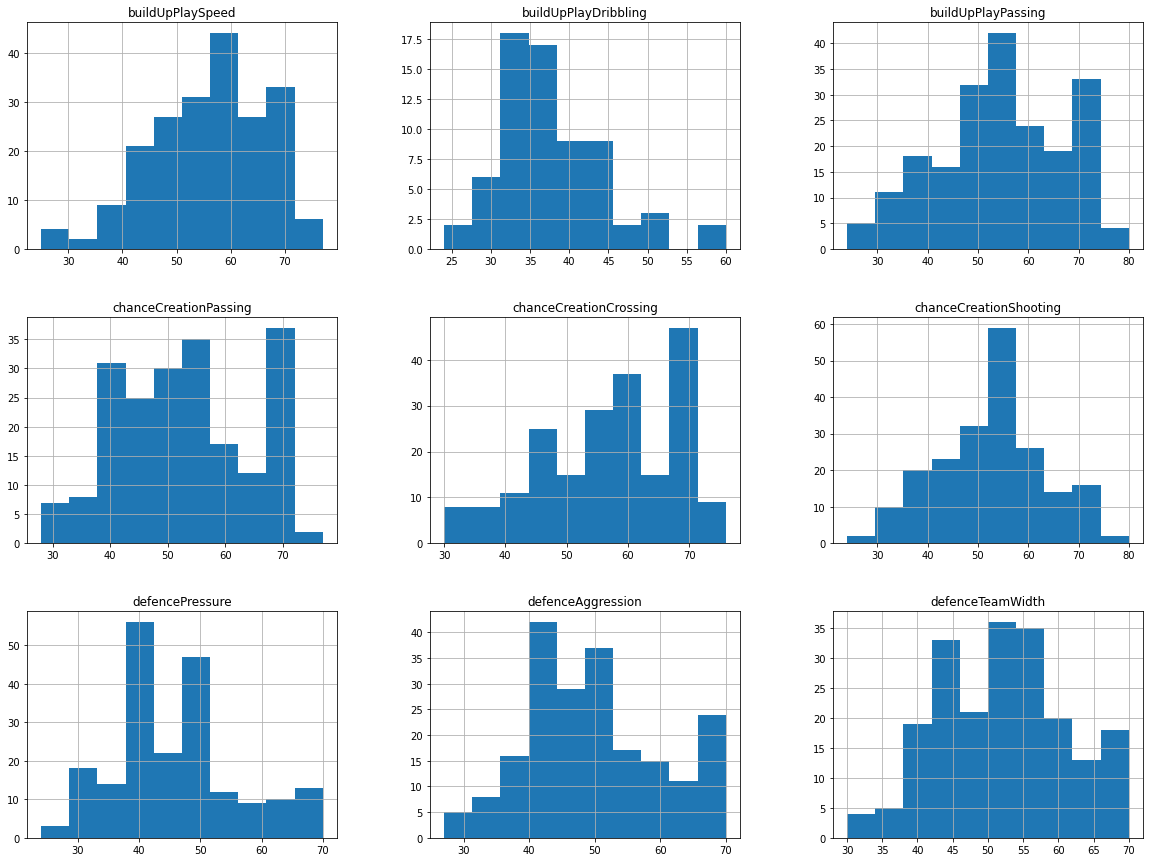

In [10]:
team_attr.hist(figsize=(20,15), column=['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 
                                        'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
                                       'defencePressure', 'defenceAggression', 'defenceTeamWidth'])
plt.show()

In [11]:
team_attr['buildUpPlaySpeedClass'].value_counts()

Balanced    161
Fast         39
Slow          4
Name: buildUpPlaySpeedClass, dtype: int64

In [12]:
team_attr['buildUpPlayDribblingClass'].value_counts()

Little    155
Normal     49
Name: buildUpPlayDribblingClass, dtype: int64

In [13]:
team_attr['buildUpPlayPassingClass'].value_counts()

Mixed    151
Long      42
Short     11
Name: buildUpPlayPassingClass, dtype: int64

In [14]:
team_attr['buildUpPlayPositioningClass'].value_counts()

Organised    198
Free Form      6
Name: buildUpPlayPositioningClass, dtype: int64

In [15]:
team_attr['chanceCreationPassingClass'].value_counts()

Normal    154
Risky      43
Safe        7
Name: chanceCreationPassingClass, dtype: int64

In [16]:
team_attr['chanceCreationCrossingClass'].value_counts()

Normal    144
Lots       56
Little      4
Name: chanceCreationCrossingClass, dtype: int64

In [17]:
team_attr['chanceCreationShootingClass'].value_counts()

Normal    177
Lots       20
Little      7
Name: chanceCreationShootingClass, dtype: int64

In [18]:
team_attr['chanceCreationPositioningClass'].value_counts()

Organised    179
Free Form     25
Name: chanceCreationPositioningClass, dtype: int64

In [19]:
team_attr['defencePressureClass'].value_counts()

Medium    170
Deep       21
High       13
Name: defencePressureClass, dtype: int64

In [20]:
team_attr['defenceAggressionClass'].value_counts()

Press      174
Double      24
Contain      6
Name: defenceAggressionClass, dtype: int64

In [21]:
team_attr['defenceTeamWidthClass'].value_counts()

Normal    184
Wide       16
Narrow      4
Name: defenceTeamWidthClass, dtype: int64

In [22]:
team_attr['defenceDefenderLineClass'].value_counts()

Cover    204
Name: defenceDefenderLineClass, dtype: int64

##### Atrybut defenceDefenderLineClass jest taki sam dla każdej drużyny, stąd można również z niego zrezygnować.

# Gracze

In [23]:
players = pd.read_sql_query('SELECT * FROM Player;', conn)
players.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,2,155782,Aaron Cresswell,189615,1989-12-15,170,146
1,5,23780,Aaron Hughes,17725,1979-11-08,182,154
2,8,30895,Aaron Lennon,152747,1987-04-16,165,139
3,11,23889,Aaron Mokoena,47189,1980-11-25,182,181
4,15,75489,Aaron Ramsey,186561,1990-12-26,177,154
5,18,23499,Aaron Wilbraham,2335,1979-10-21,190,159
6,45,40005,Abdoulaye Faye,100329,1978-02-26,187,218
7,47,37280,Abdoulaye Meite,41745,1980-10-06,185,181
8,54,324910,Abdul Rahman Baba,209620,1994-07-02,177,154
9,63,105548,Abel Hernandez,188484,1990-08-08,185,161


In [24]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1397 non-null   int64         
 1   player_api_id       1397 non-null   int64         
 2   player_name         1397 non-null   object        
 3   player_fifa_api_id  1397 non-null   int64         
 4   birthday            1397 non-null   datetime64[ns]
 5   height              1397 non-null   int64         
 6   weight              1397 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 76.5+ KB


##### Tutaj również brak niewypełnionych wartości.

In [25]:
players['weight'] = players['weight'].apply(lambda weight: weight/2.2046) #convert to kilograms
players['weight'].describe()

count    1397.000000
mean       77.451773
std         7.243972
min        59.874807
25%        72.121927
50%        77.111494
75%        82.101061
max       102.059330
Name: weight, dtype: float64

In [26]:
players['height'].describe()

count    1397.000000
mean      181.901933
std         6.521925
min       165.000000
25%       177.000000
50%       182.000000
75%       187.000000
max       203.000000
Name: height, dtype: float64

In [27]:
players['age'] = players['birthday'].apply(lambda birthday: 2016 - birthday.year)
players['age'].describe()

count    1397.000000
mean       30.449535
std         5.239513
min        17.000000
25%        27.000000
50%        30.000000
75%        34.000000
max        47.000000
Name: age, dtype: float64

##### Sztucznie dodany atrybut wieku, aby sprawdzić czy wartości dat urodzeń poszczególnych zawodników mają "sensowne" wartości.

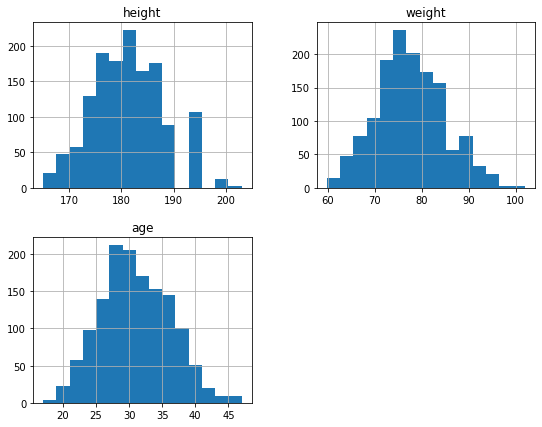

In [28]:
players.hist(column=['height', 'weight', 'age'], bins=15, figsize=(9,7))
plt.show()

# Atrybuty graczy

In [29]:
player_attr = pd.read_sql_query('SELECT * FROM Player_Attributes;', conn)
player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32708 entries, 0 to 32707
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   32708 non-null  int64         
 1   player_fifa_api_id   32708 non-null  int64         
 2   player_api_id        32708 non-null  int64         
 3   date                 32708 non-null  datetime64[ns]
 4   overall_rating       32556 non-null  float64       
 5   potential            32556 non-null  float64       
 6   preferred_foot       32556 non-null  object        
 7   attacking_work_rate  32399 non-null  object        
 8   defensive_work_rate  32556 non-null  object        
 9   crossing             32556 non-null  float64       
 10  finishing            32556 non-null  float64       
 11  heading_accuracy     32556 non-null  float64       
 12  short_passing        32556 non-null  float64       
 13  volleys              32453 non-

##### Brakuje niektórych wartości. Nie ma ich jednak zbyt dużo, więc będzie można uzupełnić je np. wartościami średnimi.

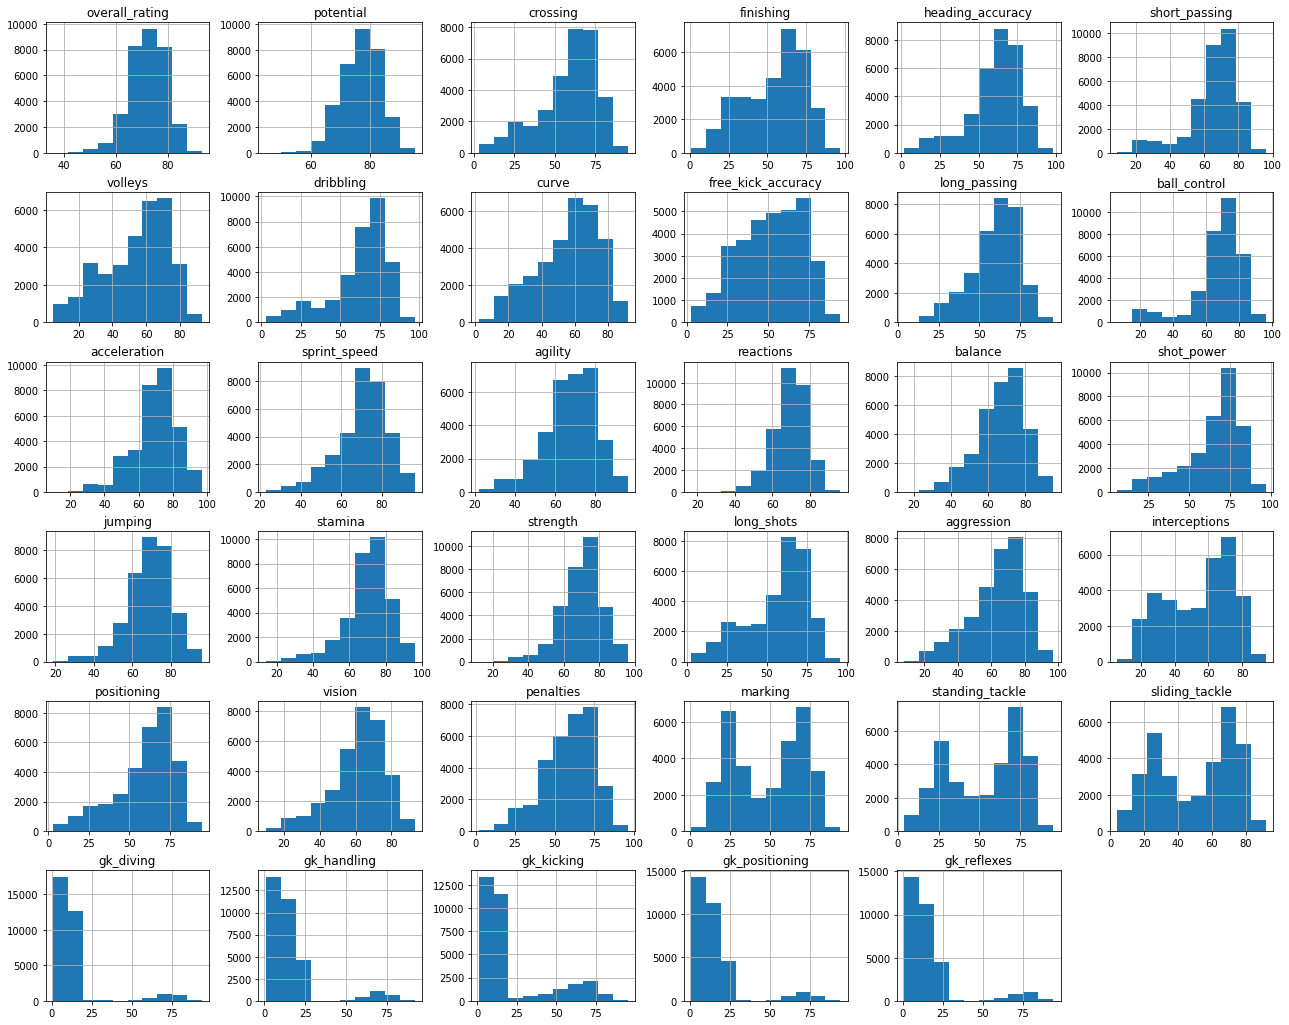

In [30]:
player_attr.hist(figsize=(22,18), column=player_attr.columns.drop(['id', 'player_fifa_api_id', 'player_api_id']))
plt.show()

In [31]:
player_attr['preferred_foot'].value_counts()

right    24278
left      8278
Name: preferred_foot, dtype: int64

In [32]:
player_attr['attacking_work_rate'].value_counts()

medium    21321
high       9229
low        1570
None        218
y            38
stoc         13
norm          6
le            4
Name: attacking_work_rate, dtype: int64

##### Atrybut posiada przypadkowe wartości, będzie to wymagało uporządkowania.

In [33]:
player_attr['defensive_work_rate'].value_counts()

medium    21325
high       6589
low        4201
_0          157
o            64
1            38
9            38
es           38
0            38
2            20
5            16
tocky        13
7             9
ormal         6
ean           4
Name: defensive_work_rate, dtype: int64

##### Podobnie jak wyżej, dużo przypadkowych wartości.

# Elo Rating

In [34]:
elo = pd.read_sql_query('SELECT * FROM EloRating;', conn)
elo = pd.merge(teams, elo, on='team_api_id')
elo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31607 entries, 0 to 31606
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                31607 non-null  int64         
 1   team_api_id       31607 non-null  int64         
 2   team_fifa_api_id  31607 non-null  int64         
 3   team_long_name    31607 non-null  object        
 4   team_short_name   31607 non-null  object        
 5   Id                31607 non-null  int64         
 6   Rank              31607 non-null  object        
 7   CountryId         31607 non-null  int64         
 8   Level             31607 non-null  int64         
 9   Elo               31607 non-null  float64       
 10  StartDate         31607 non-null  datetime64[ns]
 11  EndDate           31607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 3.1+ MB


##### Wszystkie artybuty uzupełnione.

In [35]:
elo[['team_long_name', 'Rank', 'Elo', 'StartDate', 'EndDate']].head(10)

,team_long_name,Rank,Elo,StartDate,EndDate
0,Manchester United,3,1930.452148,2007-08-17,2007-08-19
1,Manchester United,14,1843.027344,2014-08-17,2014-08-19
2,Manchester United,14,1842.388550,2014-08-20,2014-08-21
3,Manchester United,15,1840.082642,2014-08-22,2014-08-23
4,Manchester United,14,1840.082642,2014-08-24,2014-08-24
5,Manchester United,14,1836.078979,2014-08-25,2014-08-27
6,Manchester United,15,1837.623047,2014-08-28,2014-08-28
7,Manchester United,15,1836.348022,2014-08-29,2014-08-30
8,Manchester United,15,1831.453125,2014-08-31,2014-09-14
9,Manchester United,15,1835.412964,2014-09-15,2014-09-16


# Mecze

In [36]:
matches = pd.read_sql_query('SELECT * FROM Match;', conn)

In [121]:
matches.head().iloc[:,[2,3,6]]

,league_id,season,match_api_id
0,1729,2008/2009,489042
1,1729,2008/2009,489043
2,1729,2008/2009,489044
3,1729,2008/2009,489045
4,1729,2008/2009,489046


In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(matches.describe())

                id  country_id  league_id       stage  match_api_id  \
count  3040.000000      3040.0     3040.0  3040.00000  3.040000e+03   
mean   3248.500000      1729.0     1729.0    19.50000  1.178767e+06   
std     877.716735         0.0        0.0    10.96766  4.909627e+05   
min    1729.000000      1729.0     1729.0     1.00000  4.890420e+05   
25%    2488.750000      1729.0     1729.0    10.00000  7.946915e+05   
50%    3248.500000      1729.0     1729.0    19.50000  1.127220e+06   
75%    4008.250000      1729.0     1729.0    29.00000  1.537336e+06   
max    4768.000000      1729.0     1729.0    38.00000  1.989079e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count        3040.00000        3040.00000     3040.000000     3040.000000   
mean         9142.27500        9142.27500        1.550987        1.159539   
std           753.08936         753.08936        1.311615        1.144629   
min          8191.00000        8191.00000        0.0

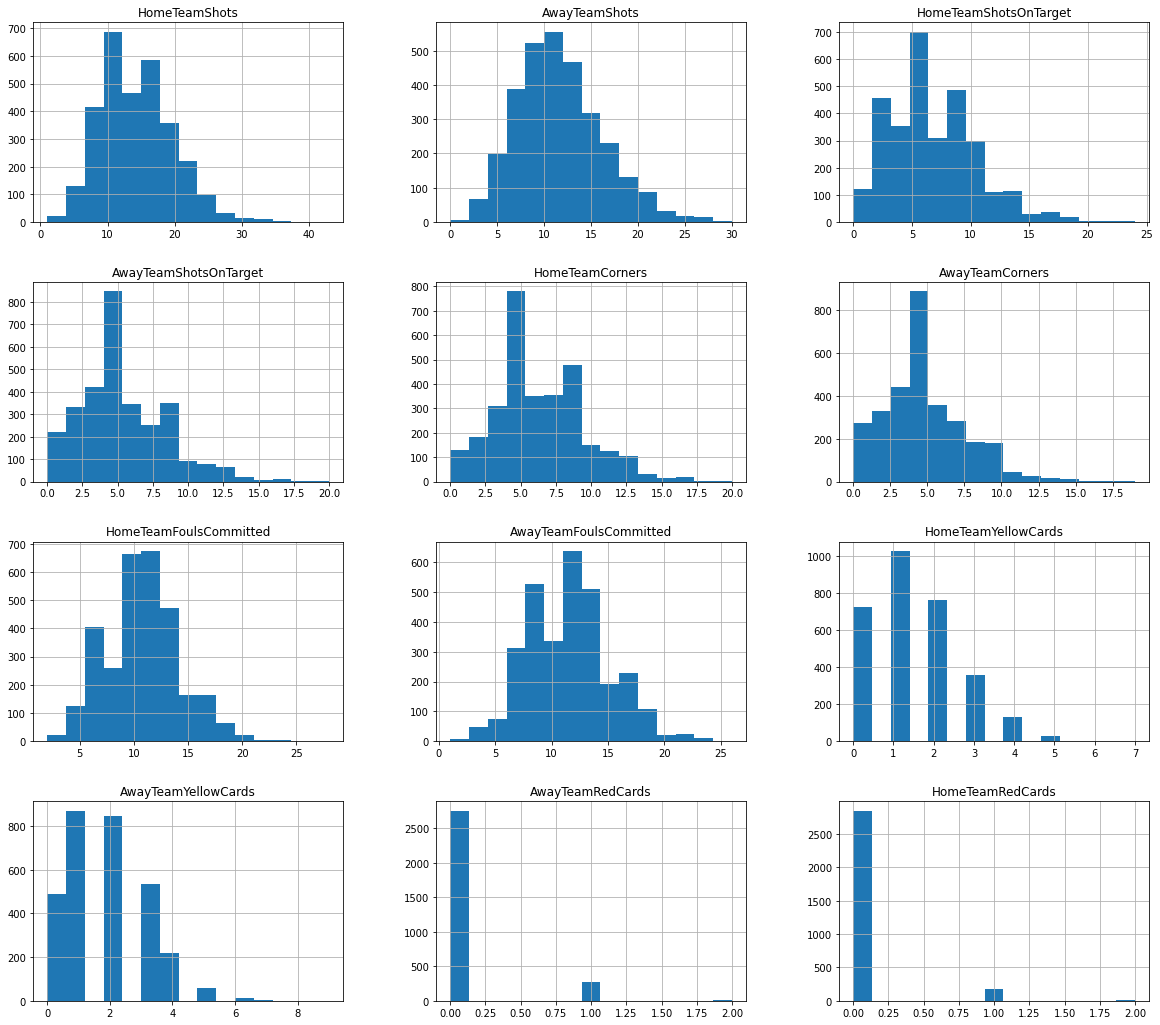

In [39]:
matches.hist(column=['HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 
                     'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFoulsCommitted', 'AwayTeamFoulsCommitted',
                    'HomeTeamYellowCards', 'AwayTeamYellowCards', 'AwayTeamRedCards', 'HomeTeamRedCards'], 
             bins=15, figsize=(20,18))
plt.show()

##### Niektóre atrybuty z brakującymi wartościami. Najwięcej brakujących występuje w danych o kursach z poszczególnych zakładów bukmacherskich. Wynika to najprawdopodobniej z tego, że nie wszystkie zakłady mają w swojej ofercie wszystkie mecze ligii angielskiej.

# Analiza jednego sezonu dla drużyny Manchester United (2015/2016)

In [155]:
man_utd_home_games = matches.loc[(matches['home_team_api_id'] == 10260) & (matches['season'] == '2015/2016')]
man_utd_away_games = matches.loc[(matches['away_team_api_id'] == 10260) & (matches['season'] == '2015/2016')]
man_utd_games = pd.concat([man_utd_home_games, man_utd_away_games])

In [156]:
won_home_games = len(man_utd_home_games.loc[man_utd_home_games['home_team_goal'] > man_utd_home_games['away_team_goal']])
won_away_games = len(man_utd_away_games.loc[man_utd_away_games['home_team_goal'] < man_utd_away_games['away_team_goal']])
draw_games = len(man_utd_games.loc[man_utd_games['home_team_goal'] == man_utd_games['away_team_goal']])
lost_games = len(man_utd_games) - won_home_games - won_away_games - draw_games

In [157]:
yellow_cards_avg = pd.concat([man_utd_home_games['HomeTeamYellowCards'], 
                              man_utd_away_games['AwayTeamYellowCards']]).mean()
red_cards_avg = pd.concat([man_utd_home_games['HomeTeamRedCards'], 
                           man_utd_away_games['AwayTeamRedCards']]).mean()

In [158]:
shots_on_target_avg = pd.concat([man_utd_home_games['HomeTeamShotsOnTarget'], 
                                 man_utd_away_games['AwayTeamShotsOnTarget']]).mean()
corners_avg = pd.concat([man_utd_home_games['HomeTeamCorners'], 
                                 man_utd_away_games['AwayTeamCorners']]).mean()

In [159]:
home_odds_avg = man_utd_home_games.iloc[:,[77, 80, 83, 86, 89, 92, 95, 98, 101, 104]].mean().mean()
away_odds_avg = man_utd_away_games.iloc[:,[79, 82, 85, 88, 91, 94, 97, 100, 103, 106]].mean().mean()

In [160]:
summary = pd.DataFrame([[won_home_games, 
                         won_away_games, 
                         draw_games, 
                         lost_games, 
                         yellow_cards_avg, 
                         red_cards_avg, 
                         shots_on_target_avg, 
                         corners_avg, 
                         home_odds_avg, 
                         away_odds_avg]], 
                       columns=['Won Home Games', 
                                'Won Away Games', 
                                'Draw Games', 
                                'Lost Games', 
                                'Yellow cards per match', 
                                'Red cards per match', 
                                'Shot on target per match',
                                'Corners per match',
                                'Average odds for home win', 
                                'Average odds for away win'])
summary

,Won Home Games,Won Away Games,Draw Games,Lost Games,Yellow cards per match,Red cards per match,Shot on target per match,Corners per match,Average odds for home win,Average odds for away win
0,12,7,9,10,1.710526,0.026316,3.763158,6.0,1.790376,2.578271
